Simulation finished!!!

In [1]:
using HDF5
using ITensors
using LinearAlgebra
using Plots
using ITensorMPS
using Observers
using LaTeXStrings
plot_font = "Computer Modern";

In [2]:
N = 30 # System size
J1 = 2; # Hopping parameters
J2 = 0.2;
h=2;
#PBC = 0; # Periodic boundary conditions

# Define N S=1/2 spin indices
sites = siteinds("S=1/2",N);

In [3]:

T = 1  # Final time
δt = 0.0001   # Time step
time = 0.0:δt:T   # Time vector
tbigstep = 10   # Calculate expectation values each tbigstep times
num_expvals = Int(((length(time)-1)/tbigstep)) + 1; # Number of times expectation values will be calculated. The ±1 is to account correctly for t = 0  
cutoff = 1E-10;   # Truncation allowed per step
χ = 300; # Maximum bond dimension

In [4]:
E0 = zeros(num_expvals); # Norm of evolved state
#Popul = zeros(num_expvals,N); # Number of bosons per site
#Coherences = zeros(num_expvals,N,N)+1im*zeros(num_expvals,N,N); # Coherences between all sites, can be complex
Time_expvals = zeros(num_expvals,1); # Time of expectation values

In [5]:
function Hamiltonian(N,sites,J1,J2,h)

    # Initiate construction
    ops = OpSum()

    # Hopping terms
    for j=1:N-1
        ops += J1,"Sz",j,"Sz",j+1
        ops += J1,"Sz",j,"Sz",j+1    
    end
    for j=1:N-2
        ops += J2,"Sz",j,"Sz",j+2
        ops += J2,"Sz",j,"Sz",j+2    
    end
    for j=1:N
        ops += -h,"Sx",j
    end

    # PBC if required
   

    H = MPO(ops,sites);
    
    return H;
    
end;

In [6]:
function InitialState(sites,N)
    
    state = [isodd(n) ? "+" : "+" for n=1:N];
    ψi = MPS(sites,state);
    
    return ψi;
end

InitialState (generic function with 1 method)

In [7]:
H = Hamiltonian(N,sites,J1,J2,h);
ψ0 = InitialState(sites,N);

In [8]:
ψ = ψ0

count_expvals = 1;

for t in 1:length(time)-1
    
    ψ = tdvp(H, -im * δt, ψ; time_step = -im * δt, cutoff = cutoff, maxdim = χ, outputlevel=0, normalize=true);
    
    normalize!(ψ)
    
    if(mod(t,tbigstep)== 0)
       
        println("Calculating expectation values for $(t) number of steps")
        count_expvals = count_expvals + 1;

        Time_expvals[count_expvals] = t*δt;
        #normalize!(ψ)
        # The state is not normalized, just the expectation values in the function
        E0[count_expvals ] = real(inner(ψ',H,ψ));
    end
    
end;

Calculating expectation values for 10 number of steps
Calculating expectation values for 20 number of steps
Calculating expectation values for 30 number of steps
Calculating expectation values for 40 number of steps
Calculating expectation values for 50 number of steps
Calculating expectation values for 60 number of steps
Calculating expectation values for 70 number of steps
Calculating expectation values for 80 number of steps
Calculating expectation values for 90 number of steps
Calculating expectation values for 100 number of steps
Calculating expectation values for 110 number of steps
Calculating expectation values for 120 number of steps
Calculating expectation values for 130 number of steps
Calculating expectation values for 140 number of steps
Calculating expectation values for 150 number of steps
Calculating expectation values for 160 number of steps
Calculating expectation values for 170 number of steps
Calculating expectation values for 180 number of steps
Calculating expecta

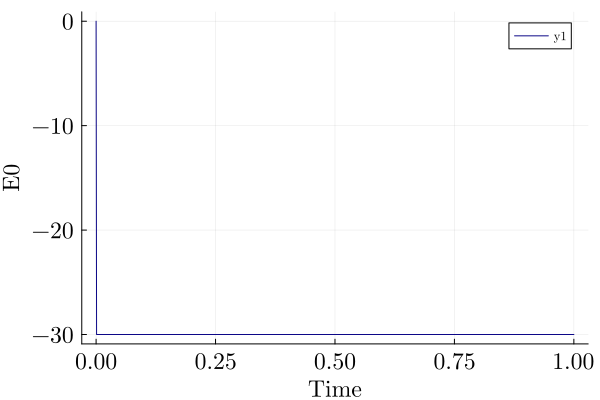

In [9]:
plot(Time_expvals,E0, xlabel = "Time", ylabel = "E0", xtickfontsize = 15, ytickfontsize = 15, xguidefontsize = 15, yguidefontsize = 15, colorbar_tickfontsize = 15, c = :plasma, fontfamily=plot_font)

In [10]:
H2 = real(inner(H,ψ,H,ψ));
H1=real(inner(ψ',H,ψ));

var = H2-H1^2;
@show var

var = 28.817396041453094


28.817396041453094

In [ ]:
ψ = ψ0

count_expvals = 1;
N_f=1e4;
ni=1;
while var>1e-6 && ni<N_f
    
    
    ψ = tdvp(H, -im * δt, ψ; time_step = -im * δt, cutoff = cutoff, maxdim = χ, outputlevel=0, normalize=true);
    
    normalize!(ψ)
    H2 = real(inner(H,ψ,H,ψ));
    H1=real(inner(ψ',H,ψ));
    var = H2-H1^2;

    if(mod(ni,tbigstep)== 0)
       
        println("Calculating expectation values for $(ni) number of steps and var=$(var)")
        count_expvals = count_expvals + 1;

       # Time_expvals[count_expvals] = ni*δt;
        #normalize!(ψ)
        # The state is not normalized, just the expectation values in the function
        #E0[count_expvals ] = real(inner(ψ',H,ψ));
    end
    
    ni=ni+1;
    
end;
@show H1

Calculating expectation values for 10 number of steps and var=29.280002116934945
Calculating expectation values for 20 number of steps and var=29.280008475512155
Calculating expectation values for 30 number of steps and var=29.280019073159153
Calculating expectation values for 40 number of steps and var=29.28003390975037
Calculating expectation values for 50 number of steps and var=29.280052985108398
Calculating expectation values for 60 number of steps and var=29.280076299005458
Calculating expectation values for 70 number of steps and var=29.280103851160924
Calculating expectation values for 80 number of steps and var=29.280135641244435
Calculating expectation values for 90 number of steps and var=29.2801716688736
Calculating expectation values for 100 number of steps and var=29.280211933615146
Calculating expectation values for 110 number of steps and var=29.280256434984405
Calculating expectation values for 120 number of steps and var=29.28030517244555
Calculating expectation value